In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from functions import *

In [110]:
def plot_relationship(df):
    ax = df.plot(linewidth = 2, fontsize = 12)
    ax.set_xlabel('Date')
    ax.legend(fontsize =15)
    plt.show()

In [111]:
df = pd.read_csv('database.csv')

In [112]:
df = clean_data(df)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2221 entries, 2013-04-28 to 2019-05-27
Data columns (total 6 columns):
Open          2221 non-null float64
High          2221 non-null float64
Low           2221 non-null float64
Close         2221 non-null float64
Volume        2221 non-null object
Market_cap    2221 non-null object
dtypes: float64(4), object(2)
memory usage: 121.5+ KB


In [114]:
df_closing = df.Close
df_closing = df_closing.resample('M').mean()

In [115]:
df_closing.drop(df_closing.index[-1], inplace = True)

In [116]:
df_closing.index = df_closing.index.strftime('%Y-%m')

In [117]:
gold = pd.read_csv("Gold_monthly_csv.csv")

In [118]:
gold.Date = pd.to_datetime(gold.Date)
gold.set_index('Date', inplace = True)
gold.sort_index(inplace= True)

In [119]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73 entries, 2013-04-01 to 2019-04-01
Data columns (total 1 columns):
Price    73 non-null float64
dtypes: float64(1)
memory usage: 1.1 KB


In [120]:
df_closing.shape

(73,)

In [121]:
gold.shape

(73, 1)

In [122]:
data = pd.concat([df_closing, gold], join = 'outer', axis = 1)

In [123]:
data.columns = ['btc_price', "gold_price"]

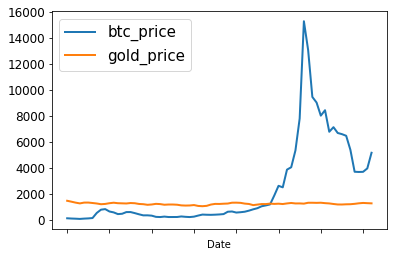

In [124]:
ax = data.plot(linewidth = 2, fontsize = 12)
ax.set_xlabel('Date')
ax.legend(fontsize = 15)
plt.show()

In [125]:
#Log transformations 
data['btc_log'] = np.log(data.btc_price)
data['gold_log']= np.log(data.gold_price)

In [126]:
data_log = data[['btc_log', "gold_log"]]

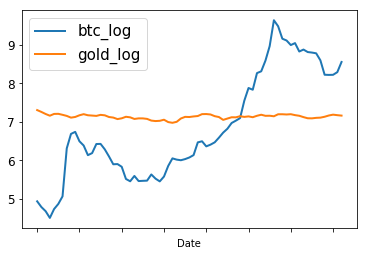

In [127]:
plot_relationship(data_log)

In [128]:
print(data_log[['btc_log', 'gold_log']].corr(method = 'spearman'))

           btc_log  gold_log
btc_log   1.000000  0.162316
gold_log  0.162316  1.000000


# Google Trends 

In [129]:
trend_df = pd.read_csv('multiTimeline.csv', header = 1)

In [130]:
trend_df.head()

,Week,bitcoin: (Worldwide)
0,2014-06-01,3
1,2014-06-08,3
2,2014-06-15,3
3,2014-06-22,2
4,2014-06-29,2


In [131]:
trend_df.columns = ['Date', 'trend_level']

In [132]:
trend_df.Date = pd.to_datetime(trend_df.Date)
trend_df.set_index("Date", inplace = True)
trend_df.sort_index(inplace = True)

In [133]:
trend_df = trend_df.resample('M').mean()

In [134]:
trend_df.shape

(60, 1)

In [135]:
df_2014_closing = df_closing.loc[df_closing.index > '2014-05']

In [136]:
df_2014_closing.shape

(59,)

In [137]:
trend_df.index = trend_df.index.strftime('%Y-%m')

In [138]:
trend_df.shape

(60, 1)

In [139]:
df_2014_closing.shape

(59,)

In [140]:
trend_df.drop(trend_df.index[-1], inplace= True)

In [141]:
trend_df.shape

(59, 1)

In [142]:
total_trends_df = pd.concat([trend_df, df_2014_closing], join = 'outer', axis = 1)

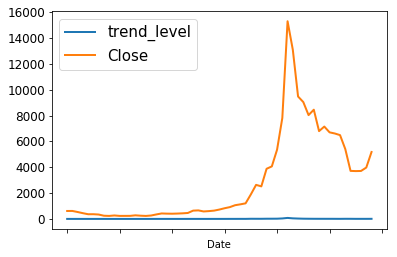

In [143]:
plot_relationship(total_trends_df)

In [144]:
total_trends_df.columns

Index(['trend_level', 'Close'], dtype='object')

In [145]:
print(total_trends_df[['trend_level', 'Close']].corr(method = 'spearman'))

             trend_level  Close
trend_level        1.000  0.928
Close              0.928  1.000


# Standardizing Gold and BTC

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
normalized_df = data[['btc_price', 'gold_price']]

In [148]:
normalized_df = (normalized_df - normalized_df.mean())/normalized_df.std()

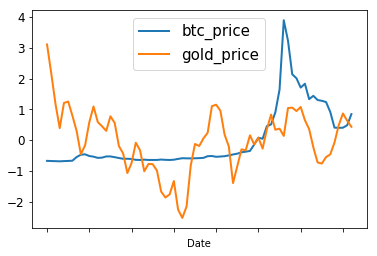

<Figure size 432x288 with 0 Axes>

In [164]:
plot_relationship(normalized_df)
plt.savefig('Stand_btc_vs_gold.png')

# Standardizing Trends and BTC 

In [150]:
total_trends_df.head()

,trend_level,Close
2014-06,2.60,615.917000
2014-07,2.00,618.025161
2014-08,2.60,536.088065
2014-09,2.25,445.186000
2014-10,2.25,364.149355


In [151]:
normalized_trends = total_trends_df.copy()
normalized_trends = (normalized_trends - normalized_trends.mean())/normalized_trends.std()

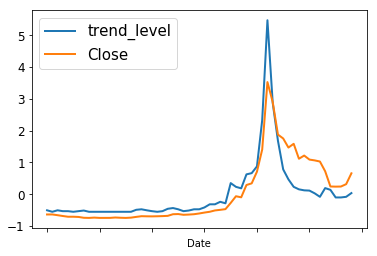

In [152]:
plot_relationship(normalized_trends)